<a href="https://colab.research.google.com/github/suchandra1523/NAGA_SUCHANDRA_TIRUMALASETTI_INFO_5731/blob/main/Tirumalasetti_NagaSuchandra_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import model_selection


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
u = files.upload()

Saving stsa-train.txt to stsa-train.txt


In [ ]:
u = files.upload()

Saving stsa-test.txt to stsa-test.txt


In [ ]:
def  text_split(x):
  x = x.split(" ")
  return x[0], x[1:]

In [ ]:
train = pd.DataFrame(columns= ['text', 'target'])
test = pd.DataFrame(columns= ['text', 'target'])
with open('stsa-train.txt') as f:
  for i in f.readlines():
    target, text = text_split(i)
    train.loc[len(train.index)] = [text, target]

with open('stsa-test.txt') as f:
  for i in f.readlines():
    target, text = text_split(i)
    test.loc[len(test.index)] = [text, target]

In [ ]:
test

,text,target
0,"[no, movement, ,, no, yuks, ,, not, much, of, ...",0
1,"[a, gob, of, drivel, so, sickly, sweet, ,, eve...",0
2,"[gangs, of, new, york, is, an, unapologetic, m...",0
3,"[we, never, really, feel, involved, with, the,...",0
4,"[this, is, one, of, polanski, 's, best, films,...",1
...,...,...
1816,"[an, often-deadly, boring, ,, strange, reading...",0
1817,"[the, problem, with, concept, films, is, that,...",0
1818,"[safe, conduct, ,, however, ambitious, and, we...",0
1819,"[a, film, made, with, as, little, wit, ,, inte...",0


In [ ]:
train

,text,target
0,"[a, stirring, ,, funny, and, finally, transpor...",1
1,"[apparently, reassembled, from, the, cutting-r...",0
2,"[they, presume, their, audience, wo, n't, sit,...",0
3,"[this, is, a, visually, stunning, rumination, ...",1
4,"[jonathan, parker, 's, bartleby, should, have,...",1
...,...,...
6915,"[painful, ,, horrifying, and, oppressively, tr...",1
6916,"[take, care, is, nicely, performed, by, a, qui...",0
6917,"[the, script, covers, huge, ,, heavy, topics, ...",0
6918,"[a, seriously, bad, film, with, seriously, war...",0


In [ ]:
stop_word = stopwords.words('english')
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(texts):
  without_punt = []
  without_stop_w = []
  for text in texts:
    text = text.strip()
    text = text.lower()
    if text not in string.punctuation:
      without_punt.append(text)
    if text not in stop_word:
      without_stop_w.append(text)
  without_num = []
  for word in without_stop_w:
      if word.isdigit():
          continue
      if word.isalnum():
          word = list(word)
          words = [i for i in word if i not in p]
          word = ''.join(words)
          without_num.append(word)
      else:
          without_num.append(word)
  without_len1_2 = [word for word in without_num if len(word) >=3]
  return without_len1_2

In [ ]:
train['text'] = train['text'].apply(text_manipulation)
test['text'] = test['text'].apply(text_manipulation)

In [ ]:
c = Counter()
for text in train['text']:
  for word in text:
    c[word] += 1
print(c)

Counter({'film': 956, 'movie': 808, "n't": 535, '...': 525, 'one': 446, 'like': 413, 'story': 289, '-rrb-': 287, '-lrb-': 286, 'even': 221, 'good': 214, 'comedy': 212, 'much': 209, 'characters': 199, 'time': 188, 'funny': 181, 'little': 174, 'way': 167, 'never': 158, 'director': 157, 'make': 157, 'work': 152, 'would': 149, 'bad': 149, 'makes': 149, 'love': 145, 'enough': 143, 'may': 138, 'life': 136, 'best': 131, 'movies': 131, 'could': 127, 'new': 126, 'drama': 123, 'something': 120, 'well': 117, 'made': 117, 'really': 117, 'performances': 111, 'many': 109, 'plot': 109, 'nothing': 109, 'films': 108, 'better': 108, 'action': 108, 'without': 107, 'every': 106, 'people': 103, 'two': 100, 'see': 99, 'look': 99, 'ever': 98, "'re": 97, 'cast': 96, 'still': 94, 'humor': 94, 'also': 94, 'great': 94, 'sense': 91, 'script': 91, 'fun': 89, 'long': 89, 'audience': 88, 'often': 88, 'character': 87, 'feel': 86, 'might': 86, 'first': 85, 'kind': 84, 'performance': 83, 'big': 83, 'seems': 83, 'world'

In [ ]:

top_400_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_400_voc = {k:c[k] for k in list(top_400_voc.keys())[:400]}
features = list(top_400_voc.keys())

In [ ]:
import pandas as pd
df_train = pd.DataFrame(columns = features)
df_test = pd.DataFrame(columns = features)


In [ ]:
def term_document_matrix(word_list):
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            dict()[word] = occ
        else:
            dict()[word] = 0
    return dict()


In [ ]:
df_train['Target'] = train['target']

<ipython-input-38-dc03581d5a4c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['Target'] = train['target']


In [ ]:
df_train

,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,genre,need,simply,idea,smart,plays,series,goes,whole,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6917,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6918,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for col, row in test.iterrows():
  w_list = term_document_matrix(row['text'])
  df_test.loc[len(df_test.index)] = w_list

In [ ]:
df_test['Target'] = test['target']
df_test

<ipython-input-41-3732b1a4b20a>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['Target'] = test['target']


,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,genre,need,simply,idea,smart,plays,series,goes,whole,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Multinomial NB**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
mul_nav_model = MultinomialNB()

In [ ]:
#cross validation
cs  = model_selection.cross_val_score(mul_nav_model, x, y, cv=10)
print(cs)

[0.6101083  0.64440433 0.66967509 0.65703971 0.62093863 0.65523466
 0.64014467 0.65641953 0.65461121 0.66184448]


In [ ]:
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)

MultinomialNB()

In [ ]:
pred = mul_nav_model.predict(df_test[features])

In [ ]:
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       912
           1       0.63      0.75      0.68       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.65      1821
weighted avg       0.66      0.66      0.65      1821



**SVM**

In [ ]:
from sklearn import svm
svm_model = svm.SVC()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(svm_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
svm_model.fit(x,y)

[0.66606498 0.61913357 0.66787004 0.64620939 0.58303249 0.68050542
 0.62567812 0.62929476 0.61663653 0.65280289]


SVC()

In [ ]:
pred = svm_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.69      0.55      0.62       912
           1       0.63      0.75      0.68       909

    accuracy                           0.65      1821
   macro avg       0.66      0.65      0.65      1821
weighted avg       0.66      0.65      0.65      1821



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(knn_model, x, y, cv=10)
print(cs)

[0.55956679 0.56137184 0.54873646 0.62454874 0.60469314 0.62635379
 0.60759494 0.59312839 0.58589512 0.59312839]


In [ ]:
x = df_train[features]
y = df_train['Target']
knn_model.fit(x,y)
pred = knn_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       912
           1       0.59      0.51      0.55       909

    accuracy                           0.58      1821
   macro avg       0.58      0.58      0.58      1821
weighted avg       0.58      0.58      0.58      1821



**DECISION TREE**

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(tree_model, x, y, cv=10)
print(cs)

[0.58483755 0.60288809 0.6299639  0.61732852 0.57220217 0.55776173
 0.60216998 0.60759494 0.57866184 0.57142857]


In [ ]:
x = df_train[features]
y = df_train['Target']
tree_model.fit(x,y)

DecisionTreeClassifier()

In [ ]:
pred = tree_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       912
           1       0.60      0.53      0.57       909

    accuracy                           0.59      1821
   macro avg       0.59      0.59      0.59      1821
weighted avg       0.59      0.59      0.59      1821



**randomforest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(forest_model, x, y, cv=10)
print(cs)

[0.61913357 0.65523466 0.63537906 0.59747292 0.62093863 0.58303249
 0.60216998 0.63110307 0.62748644 0.58951175]


In [ ]:
x = df_train[features]
y = df_train['Target']
forest_model.fit(x,y)

RandomForestClassifier()

In [ ]:
pred = forest_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       912
           1       0.64      0.57      0.60       909

    accuracy                           0.62      1821
   macro avg       0.62      0.62      0.62      1821
weighted avg       0.62      0.62      0.62      1821



**XGBoost**

In [ ]:
from xgboost import XGBClassifier
bst_model = XGBClassifier()

In [ ]:
def string_ch(x):
  return int(x)
  tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target'].apply(string_ch)
cs  = model_selection.cross_val_score(bst_model, x, y, cv=10)
print(cs)

[0.63176895 0.65884477 0.68231047 0.62454874 0.66245487 0.62635379
 0.61663653 0.68716094 0.62206148 0.62025316]


In [ ]:
x = df_train[features]
y = df_train['Target'].apply(string_ch)
bst_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = bst_model.predict(df_test[features])
print(classification_report(df_test['Target'].apply(string_ch), pred))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       912
           1       0.63      0.75      0.69       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.65      1821
weighted avg       0.66      0.66      0.65      1821



**Word2Vec**

In [ ]:
from gensim.models import Word2Vec

In [ ]:
t_df = pd.concat([train, test])

In [ ]:
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)

In [ ]:
word2vec.build_vocab([i for i in t_df['text']])

In [ ]:
words = set(word2vec.wv.index_to_key )

In [ ]:
import numpy as np
k = list()
for ls in t_df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))
final = list()
for i in k:
  final.append(np.array(i))
final_1 = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)


In [ ]:
p = pd.DataFrame(final_1)
p

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000757,0.002255,0.002030,-0.005421,0.000784,-0.005349,0.004690,0.001427,0.001126,0.001172,...,0.001263,0.000432,0.001635,-0.002300,0.003737,-0.000247,0.002996,0.003703,0.000262,-0.001648
1,-0.004768,0.001027,0.003397,0.000224,-0.004614,0.000423,0.000570,0.001186,-0.000396,0.001570,...,0.005670,0.003467,-0.000930,0.006921,0.001199,0.002495,-0.000634,-0.001536,0.003766,0.001292
2,0.000609,-0.000492,0.002113,0.000257,0.001667,0.000425,-0.000737,0.002463,0.000342,0.000585,...,0.001447,0.003373,-0.000286,0.000649,0.002566,0.003283,0.001632,0.000894,0.000054,0.002296
3,-0.001654,-0.001845,0.003310,0.000913,0.000485,-0.000426,-0.001738,-0.000462,-0.000705,0.000087,...,0.002566,0.001909,-0.001976,0.004352,0.002855,0.003930,0.001311,-0.000465,-0.001840,0.002259
4,0.001410,-0.001984,0.000076,-0.001960,-0.002929,-0.000384,0.004550,0.003672,-0.000427,0.002060,...,0.000783,0.000587,0.000825,0.001727,-0.000057,0.002387,-0.002041,0.001970,-0.000916,-0.001172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0.001164,-0.000600,-0.000596,-0.002470,0.001388,0.000753,-0.000593,-0.001227,-0.000979,-0.002881,...,0.000382,0.001057,0.002783,-0.000343,-0.003848,-0.002693,0.000603,-0.001110,0.001082,-0.000573
8737,-0.002242,-0.000542,0.003749,-0.000007,-0.001611,-0.002029,0.002017,0.000051,-0.002733,-0.000931,...,0.001434,0.000679,0.002789,-0.004442,0.005002,-0.003213,0.001189,-0.001125,-0.000112,0.003282
8738,0.003420,-0.000010,-0.001959,-0.000289,0.000367,0.000621,-0.000902,0.002861,-0.000855,-0.000811,...,-0.000611,0.004264,-0.000251,-0.001921,-0.000317,-0.000563,0.000117,-0.001657,0.003757,0.002098
8739,-0.001526,-0.001371,0.001291,-0.001522,-0.000168,0.000012,0.000760,0.001995,-0.001011,0.001270,...,-0.000566,0.001764,0.001848,-0.000926,0.001023,0.003854,-0.002254,-0.002976,0.000878,-0.000610


In [ ]:
t_df = t_df.reset_index()
p['target'] = t_df['target']
mul_nav_model = MultinomialNB()
f = list(p.columns)
f.remove('target')
f
tr, tes  = train_test_split(p, test_size=0.2)
x = p[f]
y = p['target']
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)
pred = mul_nav_model.predict(x)
print(classification_report(df_train['Target'], pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      3310
           1       0.66      0.75      0.70      3610

    accuracy                           0.67      6920
   macro avg       0.67      0.67      0.67      6920
weighted avg       0.67      0.67      0.67      6920



**BERT**

In [ ]:
pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cuda_available = torch.cuda.is_available()
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "use_early_stopping" : 0,
             "num_train_epochs": 3}

model = ClassificationModel(
    "bert", 'bert-base-uncased',
    num_labels=2,
    args=train_args,
     use_cuda=cuda_available
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train['target'] = train['target'].apply(string_ch)

In [ ]:
model.train_model(train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/865 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/865 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/865 [00:00<?, ?it/s]

In [ ]:
test


,text,target
0,"[movement, yuks, much, anything]",0
1,"[gob, drivel, sickly, sweet, even, eager, cons...",0
2,"[gangs, new, york, unapologetic, mess, whose, ...",0
3,"[never, really, feel, involved, story, ideas, ...",0
4,"[one, polanski, best, films]",1
...,...,...
1816,"[often-deadly, boring, strange, reading, class...",0
1817,"[problem, concept, films, concept, poor, one, ...",0
1818,"[safe, conduct, however, ambitious, well-inten...",0
1819,"[film, made, little, wit, interest, profession...",0


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
test


,text,target
0,"[movement, yuks, much, anything]",0
1,"[gob, drivel, sickly, sweet, even, eager, cons...",0
2,"[gangs, new, york, unapologetic, mess, whose, ...",0
3,"[never, really, feel, involved, story, ideas, ...",0
4,"[one, polanski, best, films]",1
...,...,...
1816,"[often-deadly, boring, strange, reading, class...",0
1817,"[problem, concept, films, concept, poor, one, ...",0
1818,"[safe, conduct, however, ambitious, well-inten...",0
1819,"[film, made, little, wit, interest, profession...",0


In [ ]:
t_df = pd.concat([train, test]).reset_index()

In [ ]:
t_df  = t_df.drop(['index', 'target'], axis = 1)
t_df

,text
0,"[stirring, funny, finally, transporting, re-im..."
1,"[apparently, reassembled, cutting-room, floor,..."
2,"[presume, audience, n't, sit, still, sociology..."
3,"[visually, stunning, rumination, love, memory,..."
4,"[jonathan, parker, bartleby, be-all-end-all, m..."
...,...
8736,"[often-deadly, boring, strange, reading, class..."
8737,"[problem, concept, films, concept, poor, one, ..."
8738,"[safe, conduct, however, ambitious, well-inten..."
8739,"[film, made, little, wit, interest, profession..."


In [ ]:
stop_word = stopwords.words('english')
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(texts):
  without_punt = []
  without_stop_w = []
  for text in texts:
    text = text.strip()
    text = text.lower()
    if text not in string.punctuation:
      without_punt.append(text)
    if text not in stop_word:
      without_stop_w.append(text)
  without_num = []
  for word in without_stop_w:
      if word.isdigit():
          continue
      if word.isalnum():
          word = list(word)
          words = [i for i in word if i not in p]
          word = ''.join(words)
          without_num.append(word)
      else:
          without_num.append(word)
  without_len1_2 = [word for word in without_num if len(word) >=3]
  return without_len1_2
t_df['text'] = t_df['text'].apply(text_manipulation)
c = Counter()
for text in t_df['text']:
  for word in text:
    c[word] += 1
print(c)

Counter({'film': 1187, 'movie': 1014, "n't": 669, '...': 649, 'one': 545, 'like': 535, 'story': 371, '-rrb-': 360, '-lrb-': 357, 'even': 287, 'much': 278, 'comedy': 274, 'good': 268, 'characters': 244, 'time': 241, 'way': 225, 'little': 224, 'funny': 223, 'make': 202, 'director': 199, 'never': 196, 'enough': 193, 'bad': 192, 'makes': 188, 'would': 186, 'work': 183, 'life': 179, 'may': 176, 'best': 175, 'love': 172, 'could': 162, 'movies': 160, 'well': 156, 'new': 155, 'really': 149, 'performances': 147, 'something': 146, 'films': 144, 'drama': 141, 'action': 138, 'made': 137, 'many': 136, 'plot': 136, 'still': 134, 'see': 134, 'people': 134, 'nothing': 133, 'two': 131, 'better': 130, 'every': 130, "'re": 127, 'great': 123, 'without': 122, 'look': 122, 'ever': 121, 'long': 120, 'cast': 119, 'get': 117, 'fun': 116, 'sense': 113, 'humor': 113, 'audience': 112, 'might': 112, 'script': 110, 'also': 110, 'though': 108, 'world': 107, 'first': 107, 'performance': 107, 'often': 106, 'character'

In [ ]:
top_400_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_400_voc = {k:c[k] for k in list(top_400_voc.keys())[:400]}

In [ ]:
features = list(top_400_voc.keys())
features


['film',
 'movie',
 "n't",
 '...',
 'one',
 'like',
 'story',
 '-rrb-',
 '-lrb-',
 'even',
 'much',
 'comedy',
 'good',
 'characters',
 'time',
 'way',
 'little',
 'funny',
 'make',
 'director',
 'never',
 'enough',
 'bad',
 'makes',
 'would',
 'work',
 'life',
 'may',
 'best',
 'love',
 'could',
 'movies',
 'well',
 'new',
 'really',
 'performances',
 'something',
 'films',
 'drama',
 'action',
 'made',
 'many',
 'plot',
 'still',
 'see',
 'people',
 'nothing',
 'two',
 'better',
 'every',
 "'re",
 'great',
 'without',
 'look',
 'ever',
 'long',
 'cast',
 'get',
 'fun',
 'sense',
 'humor',
 'audience',
 'might',
 'script',
 'also',
 'though',
 'world',
 'first',
 'performance',
 'often',
 'character',
 'another',
 'real',
 'feel',
 'big',
 'kind',
 'thing',
 'feels',
 'documentary',
 'tale',
 'thriller',
 'seems',
 'less',
 'entertaining',
 'picture',
 'screen',
 'minutes',
 'hard',
 "'ll",
 'hollywood',
 'watching',
 'take',
 'romantic',
 'far',
 'almost',
 "'ve",
 'acting',
 'heart'

In [ ]:
bog_df = pd.DataFrame(columns = features)

In [ ]:
def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix

In [ ]:
for col, row in t_df.iterrows():
  w_list = term_document_matrix(row['text'])
  bog_df.loc[len(bog_df.index)] = w_list

In [ ]:
bog_df

,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,line,sequel,written,sex,writing,live,talent,psychological,animation,leaves
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8737,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8739,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## K-means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

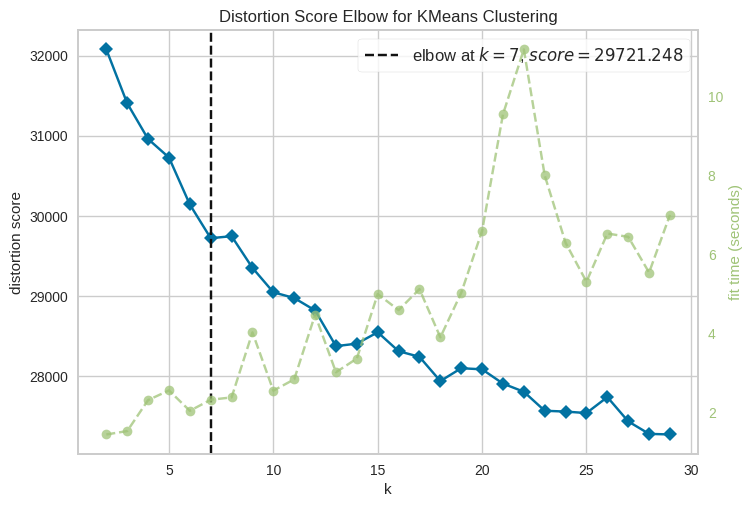

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(bog_df)
visualizer.show()

From the elbow curve it suggest the k-values as 11

In [ ]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(bog_df)
labels =k.predict(bog_df)
c_d = t_df.assign(Cluster=labels)

In [ ]:
for i in range(11):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  Cluster
0     [stirring, funny, finally, transporting, re-im...        0
1     [apparently, reassembled, cutting-room, floor,...        0
4     [jonathan, parker, bartleby, be-all-end-all, m...        0
5     [campanella, gets, tone, right, funny, middle,...        0
8     [little, less, extreme, past, longer, expositi...        0
...                                                 ...      ...
8727  [experience, watching, blobby, old-school, cgi...        0
8729                          [pretty, dicey, material]        0
8731  [subversive, meditative, clinical, poetic, pia...        0
8736  [often-deadly, boring, strange, reading, class...        0
8738  [safe, conduct, however, ambitious, well-inten...        0

[4650 rows x 2 columns]
**********
                                                   text  Cluster
12    [something, splendid-looking, particular, film...        1
43    [american, adobo, heart, -lrb-, palate, -rrb-,..

From the first task we observe that we have only 2 target values but here the clusters values shows 11 values which may act as like ratings

## DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
nn = NearestNeighbors(n_neighbors=20).fit(bog_df)
distances, indices = nn.kneighbors(bog_df)

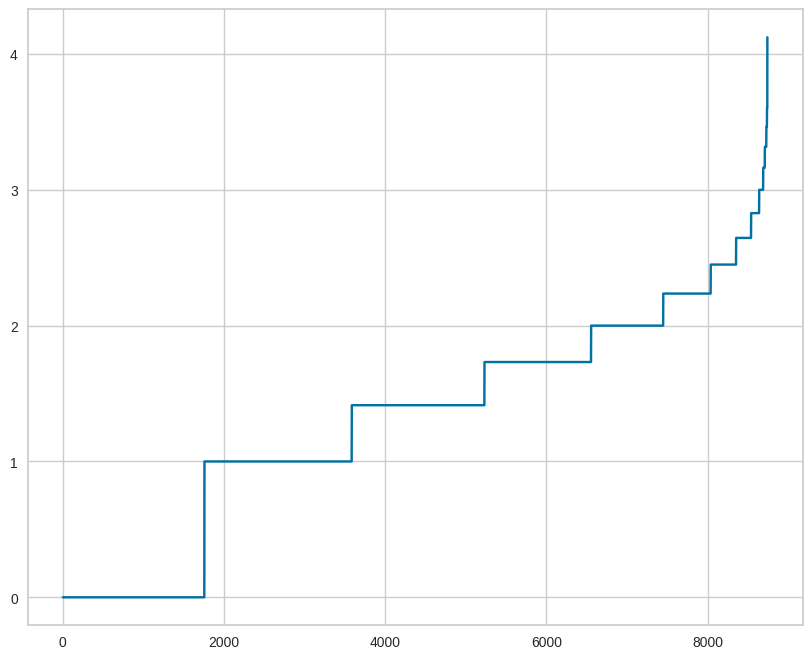

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

It shows that the eps value is 1

In [ ]:
db_model = DBSCAN(eps =  1)
db_model.fit(bog_df)
t_df['label'] = db_model.labels_

In [ ]:
for i in range(-1,1):
  print(t_df[t_df['label'] == i])
  print('*' * 10)

                                                   text  label
2     [presume, audience, n't, sit, still, sociology...     -1
3     [visually, stunning, rumination, love, memory,...     -1
5     [campanella, gets, tone, right, funny, middle,...     -1
6     [fan, film, uninitiated, plays, better, video,...     -1
8     [little, less, extreme, past, longer, expositi...     -1
...                                                 ...    ...
8734                  [..., blade, enjoyable, original]     -1
8736  [often-deadly, boring, strange, reading, class...     -1
8737  [problem, concept, films, concept, poor, one, ...     -1
8739  [film, made, little, wit, interest, profession...     -1
8740                   [real, damn, n't, funny, either]     -1

[5211 rows x 2 columns]
**********
                                                   text  label
0     [stirring, funny, finally, transporting, re-im...      0
1     [apparently, reassembled, cutting-room, floor,...      0
4     [jonathan, pa

It shows that they are 2 labels which are correct as the target in the task-1

## Hierarchical clustering

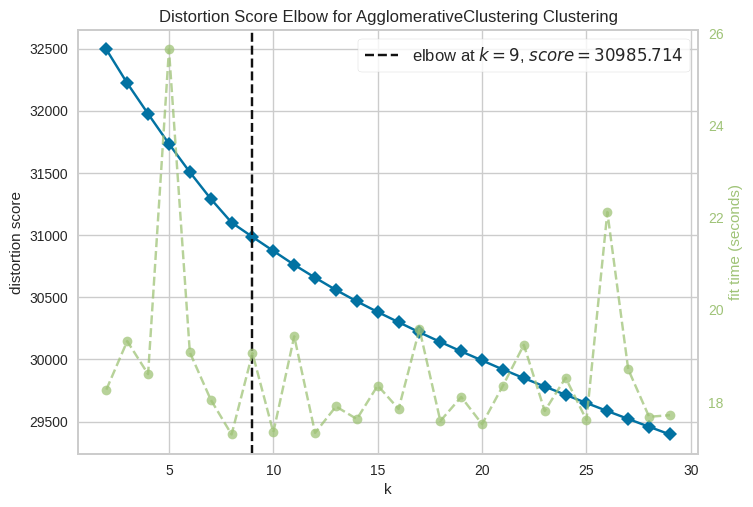

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(bog_df)
visualizer.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(bog_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
c = t_df.assign(Cluster=labels)
for i in range(9):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  Cluster
0     [stirring, funny, finally, transporting, re-im...        0
1     [apparently, reassembled, cutting-room, floor,...        0
4     [jonathan, parker, bartleby, be-all-end-all, m...        0
5     [campanella, gets, tone, right, funny, middle,...        0
8     [little, less, extreme, past, longer, expositi...        0
...                                                 ...      ...
8727  [experience, watching, blobby, old-school, cgi...        0
8729                          [pretty, dicey, material]        0
8731  [subversive, meditative, clinical, poetic, pia...        0
8736  [often-deadly, boring, strange, reading, class...        0
8738  [safe, conduct, however, ambitious, well-inten...        0

[4650 rows x 2 columns]
**********
                                                   text  Cluster
12    [something, splendid-looking, particular, film...        1
43    [american, adobo, heart, -lrb-, palate, -rrb-,..

## word2vec

In [ ]:
from gensim.models import Word2Vec
l_df = pd.concat([train, test]).reset_index()

In [ ]:
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)
word2vec.build_vocab([i for i in t_df['text']])
words = set(word2vec.wv.index_to_key )

In [ ]:
import numpy as np
k = list()
for ls in t_df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))
final = list()
for i in k:
  final.append(np.array(i))
final_1 = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)

In [ ]:
p = pd.DataFrame(final_1)
p = p.fillna(0)
p

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000757,0.002255,0.002030,-0.005421,0.000784,-0.005349,0.004690,0.001427,0.001126,0.001172,...,0.001263,0.000432,0.001635,-0.002300,0.003737,-0.000247,0.002996,0.003703,0.000262,-0.001648
1,-0.004768,0.001027,0.003397,0.000224,-0.004614,0.000423,0.000570,0.001186,-0.000396,0.001570,...,0.005670,0.003467,-0.000930,0.006921,0.001199,0.002495,-0.000634,-0.001536,0.003766,0.001292
2,0.000609,-0.000492,0.002113,0.000257,0.001667,0.000425,-0.000737,0.002463,0.000342,0.000585,...,0.001447,0.003373,-0.000286,0.000649,0.002566,0.003283,0.001632,0.000894,0.000054,0.002296
3,-0.001654,-0.001845,0.003310,0.000913,0.000485,-0.000426,-0.001738,-0.000462,-0.000705,0.000087,...,0.002566,0.001909,-0.001976,0.004352,0.002855,0.003930,0.001311,-0.000465,-0.001840,0.002259
4,0.001410,-0.001984,0.000076,-0.001960,-0.002929,-0.000384,0.004550,0.003672,-0.000427,0.002060,...,0.000783,0.000587,0.000825,0.001727,-0.000057,0.002387,-0.002041,0.001970,-0.000916,-0.001172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0.001164,-0.000600,-0.000596,-0.002470,0.001388,0.000753,-0.000593,-0.001227,-0.000979,-0.002881,...,0.000382,0.001057,0.002783,-0.000343,-0.003848,-0.002693,0.000603,-0.001110,0.001082,-0.000573
8737,-0.002242,-0.000542,0.003749,-0.000007,-0.001611,-0.002029,0.002017,0.000051,-0.002733,-0.000931,...,0.001434,0.000679,0.002789,-0.004442,0.005002,-0.003213,0.001189,-0.001125,-0.000112,0.003282
8738,0.003420,-0.000010,-0.001959,-0.000289,0.000367,0.000621,-0.000902,0.002861,-0.000855,-0.000811,...,-0.000611,0.004264,-0.000251,-0.001921,-0.000317,-0.000563,0.000117,-0.001657,0.003757,0.002098
8739,-0.001526,-0.001371,0.001291,-0.001522,-0.000168,0.000012,0.000760,0.001995,-0.001011,0.001270,...,-0.000566,0.001764,0.001848,-0.000926,0.001023,0.003854,-0.002254,-0.002976,0.000878,-0.000610


In [ ]:
l_df = l_df.drop('index', axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

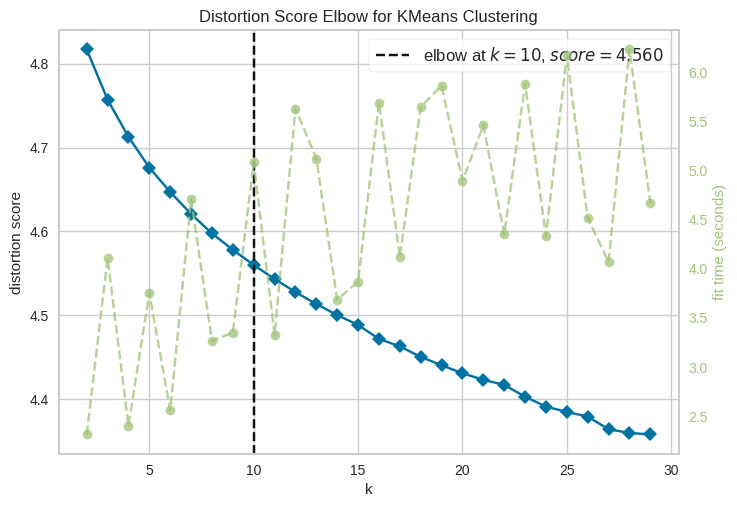

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(p)
visualizer.show()

In [ ]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(p)
labels =k.predict(p)
c_d = t_df.assign(Cluster=labels)
for i in range(9):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  label  Cluster
21                       [slick, engrossing, melodrama]      0        0
29    [gooding, offers, desperately, ingratiating, p...      0        0
33                                 [russian, word, wow]      0        0
37    [could, feel, screenwriter, every, moment, tap...     -1        0
39                  [live, mood, rather, savour, story]     -1        0
...                                                 ...    ...      ...
8639  [director, brian, levant, never, strays, far, ...     -1        0
8644  [one, hour, photo, intriguing, snapshot, one, ...     -1        0
8652  [rather, 'll, wrestle, disbelief, ground, appl...      0        0
8654  [involving, times, lapses, quite, casually, ab...      0        0
8659  [film, real, appeal, n't, clooney, fans, adven...     -1        0

[605 rows x 3 columns]
**********
                                                   text  label  Cluster
0     [stirring, funny, final

**bert**

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
l = list()
for i in t_df['text']:
  l.append(embedder.encode(i))
final_1 = list()
for i in l:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)
k  = pd.DataFrame(final_1)
k = k.fillna(0)
k


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.167969,0.021387,0.593911,-0.419377,0.052959,0.037624,0.441424,-0.185894,-0.223364,-0.333064,...,0.502056,0.175269,-0.362481,0.392488,0.008869,-0.213924,0.168814,-0.238022,-0.030440,0.462488
1,-0.307642,-0.070378,0.237972,-0.435554,-0.071650,-0.340834,0.488560,0.188070,-0.133193,-0.573156,...,0.395402,-0.079614,-0.266161,0.200320,-0.404064,-0.606785,-0.077505,-0.023523,0.162253,-0.046055
2,-0.258989,-0.001333,0.176976,-0.353039,-0.106550,-0.034013,0.484015,0.008069,-0.371364,-0.221335,...,0.628404,-0.207319,-0.440339,0.414166,-0.216534,-0.320582,-0.317502,-0.276891,0.080810,0.413341
3,0.167706,0.215035,-0.067511,-0.346632,0.143509,-0.060256,0.660729,0.127673,-0.496861,-0.552205,...,0.509036,-0.064064,-0.308608,0.416945,-0.553623,-0.472571,-0.242189,-0.106917,0.027729,0.020226
4,-0.419393,0.086907,-0.285609,-0.434780,0.037292,-0.268726,0.392590,0.303873,-0.141728,-0.582531,...,0.487357,-0.290642,-0.261489,-0.006232,-0.280016,-0.576585,-0.616981,0.167066,0.280543,0.077956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,-0.354090,0.028924,0.077289,-0.318494,-0.195434,-0.108726,0.357173,-0.159163,-0.125306,-0.178428,...,0.632020,-0.273906,-0.340170,0.183937,-0.266849,-0.522881,-0.120305,-0.117160,0.029845,0.202023
8737,-0.280311,0.026333,-0.180951,-0.469496,0.020171,0.163299,0.320515,-0.475732,-0.185448,-0.571071,...,0.725131,0.057854,-0.237736,0.082072,-0.238032,-0.418315,-0.635745,0.231502,0.181344,0.157858
8738,-0.059259,-0.010617,0.126011,-0.233975,-0.047435,-0.049755,0.666971,-0.071273,-0.477183,-0.242120,...,0.672455,-0.039150,-0.329626,0.593964,-0.255473,-0.242960,-0.464227,-0.288559,-0.003266,-0.079876
8739,0.127464,0.134004,-0.047414,-0.316123,0.045699,-0.083169,0.559973,-0.138095,-0.379682,-0.407169,...,0.658884,0.073432,-0.255416,0.181090,0.076816,-0.524404,-0.632717,0.023205,-0.154939,0.266461


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

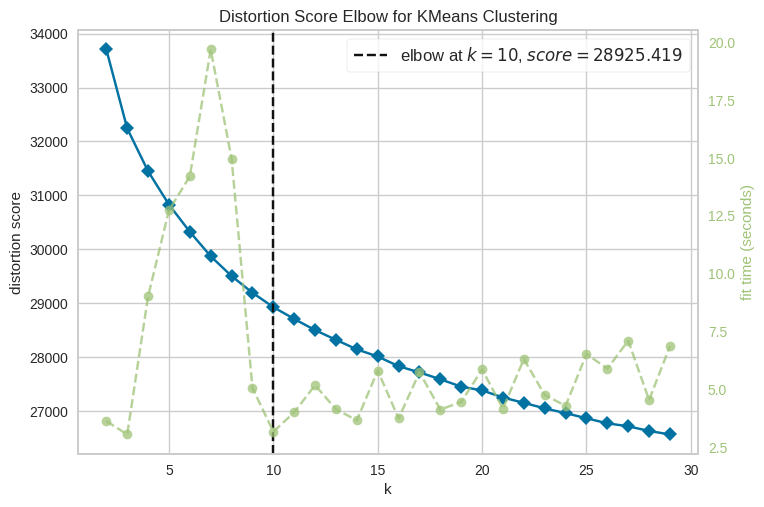

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(k)
visualizer.show()

It suggests that the k = 10

In [56]:
d=KMeans(init='k-means++',n_clusters=10,n_init=100,random_state=0).fit(k)
labels =d.predict(k)
c_d = t_df.assign(Cluster=labels)

In [57]:
for i in range(10):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  label  Cluster
17    [quiet, patient, tenacious, mr., lopez, approa...      0        0
30    [well-intentioned, effort, still, burdened, ac...     -1        0
59    [though, touch, arthouse, poetic, symbolism, h...     -1        0
97    [woodman, seems, directly, influenced, girl-me...     -1        0
103   [moments, insightful, enough, fondly, remember...      0        0
...                                                 ...    ...      ...
8713  [ana, vivid, vibrant, individual, movie, focus...      0        0
8714  [..., polished, relatively, sincere, piece, es...      0        0
8721  [mysteries, transparently, obvious, slowly, pa...      0        0
8734                  [..., blade, enjoyable, original]     -1        0
8738  [safe, conduct, however, ambitious, well-inten...      0        0

[833 rows x 3 columns]
**********
                                                   text  label  Cluster
4     [jonathan, parker, bart

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.K-means and hierarchical clustering are more traditional and interpretable, DBSCAN, Word2Vec, and BERT offer more advanced techniques with the potential for improved clustering performance, especially in capturing complex semantic relationships within text data.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The assignment was good and had learnt new cncepts.




'''